# Exploratory Data Analysis

This notebook gives in-depth data analysis of solar dataset..The data can be downloaded from this [website](https://power.larc.nasa.gov/data-access-viewer/). Select the location,time period, parameters of your choice and download the data from given formats. For this project, the location was selected as BHUBANESWAR, INDIA (LAT=20.24321,LON=85.84161). Temporal Average was selected as Daily.<br><br> The selected parameters are:-<br>
1. **All Sky Insolation Incident on a Horizontal Surface (kW-hr/m^2/day)** :- The daily average amount of the total solar radiation incident on a horizontal surface at the surface of the earth.
2. **Earth Skin Temperature (C)** :- The Earth skin temperature is meant to approximate the temperature right at the surface including the vegetated ground coverage. Thus, surfaces with less vegetation will warm in the sunlight than vegetated surfaces and cool more at night. The daily average of earth skin temperature.
3. **Wind Speed at 50 Meters (m/s)** :- The daily average of wind speed at 50 meters above the surface of the earth.
4. **Temperature at 2 Meters (C)** :- The daily average of temperature at 2 meters above the surface of the earth.
5. **Minimum Temperature at 2 Meters (C)** :- The daily minimum temperature at 2 meters above the surface of the earth.
6. **Dew/Frost Point at 2 Meters (C)** :- Temperature at which air is saturated with water vapor. The daily average of dew/frost point temperature is at 2 meters above the surface of the earth and calculated as the average of hourly values pulled from the MERRA-2 assimilation model.
7. **Maximum Wind Speed at 50 Meters (m/s)** :- The daily Maximum wind speed at 50 meters above the surface of the earth.
8. **Maximum Temperature at 2 Meters (C)** :- The daily maximum temperature at 2 meters above the surface of the earth.
9. **Specific Humidity at 2 Meters (g/kg)** :- Mass of water vapor carried by unit mass of dry air (kg water/kg dry air). The daily average of specific humidity at 2 meters above the surface of the earth.
10. **Minimum Wind Speed at 50 Meters (m/s)** :- The daily Minimum wind speed at 50 meters above the surface of the earth.
11. **Relative Humidity at 2 Meters (%)** :- Ratio of actual partial press of water vapor to the partial pressure at saturation, expressed in percent. The daily average of relative humidity at 2 meters above the surface of the earth.
12. **Precipitation (mm day-1)** :- The daily average rain rate.

* The data was downloaded in ".csv" format.
* The coloumn names were changed as per convenience.
* There were some missing values in "insolation" coloumn which were filled with the number (-999). They were replaced with the average of values of 10 days (5 days before the missing value + 5 days after the missing values).
* A coloumn is added as "day" which is equal to the row number
<br><br> The above processes was done in Microsoft Excel.

Pandas is a software library written for the Python programming language for data manipulation and analysis.<br> This library is being used for necessary operations in the dataframe.

In [4]:
#Importing the library
import pandas as pd                    # for data operations in dataframe
import matplotlib.pyplot as plt        # for visualisation
%matplotlib inline                   
import seaborn as sns                  # for visualisation

In [15]:
#Loading the exel file in the environment
data=pd.read_excel("D:\\CET\\major\\solar_original.csv")

In [16]:
# A snap of dataset to overview the data.
data.head()

,LAT,LON,YEAR,MO,DY,insolation,Earth_Skin_Temperature,Wind_Speed,Temperature,Temperature_MIN,Temperature_MAX,Relative_Humidity,Precipitation,Specific_Humidity,Dew/Frost_Point,Max_Wind_Speed,Min_Wind_Speed,day
0,20.24321,85.84161,2016,1,1,4.30,21.91,1.79,22.11,16.24,28.42,61.74,0.0,10.15,14.25,3.55,0.24,1
1,20.24321,85.84161,2016,1,2,4.23,22.33,1.93,22.57,18.45,28.61,64.57,0.0,10.92,15.45,4.37,0.58,2
2,20.24321,85.84161,2016,1,3,4.17,22.55,2.53,22.28,18.15,27.46,67.83,0.0,11.30,15.92,4.49,1.31,3
3,20.24321,85.84161,2016,1,4,4.36,21.80,3.12,21.56,15.45,28.25,56.52,0.0,9.00,12.16,5.51,1.42,4
4,20.24321,85.84161,2016,1,5,4.15,21.84,1.85,21.95,17.00,27.52,63.82,0.0,10.41,14.56,3.38,0.48,5


As we are predicting Solar Insolation of one place, we don't need "LAT","LON" columns. The coloumns ("YEAR","MO","DY","day) doesn't affect the solar insolation, we drop them off also.

In [17]:
data=data.drop(['LON','LAT','YEAR','DY','MO','day'], axis = 1) 
data.head()

,insolation,Earth_Skin_Temperature,Wind_Speed,Temperature,Temperature_MIN,Temperature_MAX,Relative_Humidity,Precipitation,Specific_Humidity,Dew/Frost_Point,Max_Wind_Speed,Min_Wind_Speed
0,4.30,21.91,1.79,22.11,16.24,28.42,61.74,0.0,10.15,14.25,3.55,0.24
1,4.23,22.33,1.93,22.57,18.45,28.61,64.57,0.0,10.92,15.45,4.37,0.58
2,4.17,22.55,2.53,22.28,18.15,27.46,67.83,0.0,11.30,15.92,4.49,1.31
3,4.36,21.80,3.12,21.56,15.45,28.25,56.52,0.0,9.00,12.16,5.51,1.42
4,4.15,21.84,1.85,21.95,17.00,27.52,63.82,0.0,10.41,14.56,3.38,0.48


In [18]:
#To check if there are any duplicate rows
data.duplicated().any()

False

In [19]:
# Concise summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   insolation              1827 non-null   float64
 1   Earth_Skin_Temperature  1827 non-null   float64
 2   Wind_Speed              1827 non-null   float64
 3   Temperature             1827 non-null   float64
 4   Temperature_MIN         1827 non-null   float64
 5   Temperature_MAX         1827 non-null   float64
 6   Relative_Humidity       1827 non-null   float64
 7   Precipitation           1827 non-null   float64
 8   Specific_Humidity       1827 non-null   float64
 9   Dew/Frost_Point         1827 non-null   float64
 10  Max_Wind_Speed          1827 non-null   float64
 11  Min_Wind_Speed          1827 non-null   float64
dtypes: float64(12)
memory usage: 171.4 KB


C:\Users\rajes\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'insolation'}>,
        <AxesSubplot:title={'center':'Earth_Skin_Temperature'}>,
        <AxesSubplot:title={'center':'Wind_Speed'}>],
       [<AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'Temperature_MIN'}>,
        <AxesSubplot:title={'center':'Temperature_MAX'}>],
       [<AxesSubplot:title={'center':'Relative_Humidity'}>,
        <AxesSubplot:title={'center':'Precipitation'}>,
        <AxesSubplot:title={'center':'Specific_Humidity'}>],
       [<AxesSubplot:title={'center':'Dew/Frost_Point'}>,
        <AxesSubplot:title={'center':'Max_Wind_Speed'}>,
        <AxesSubplot:title={'center':'Min_Wind_Speed'}>]], dtype=object)

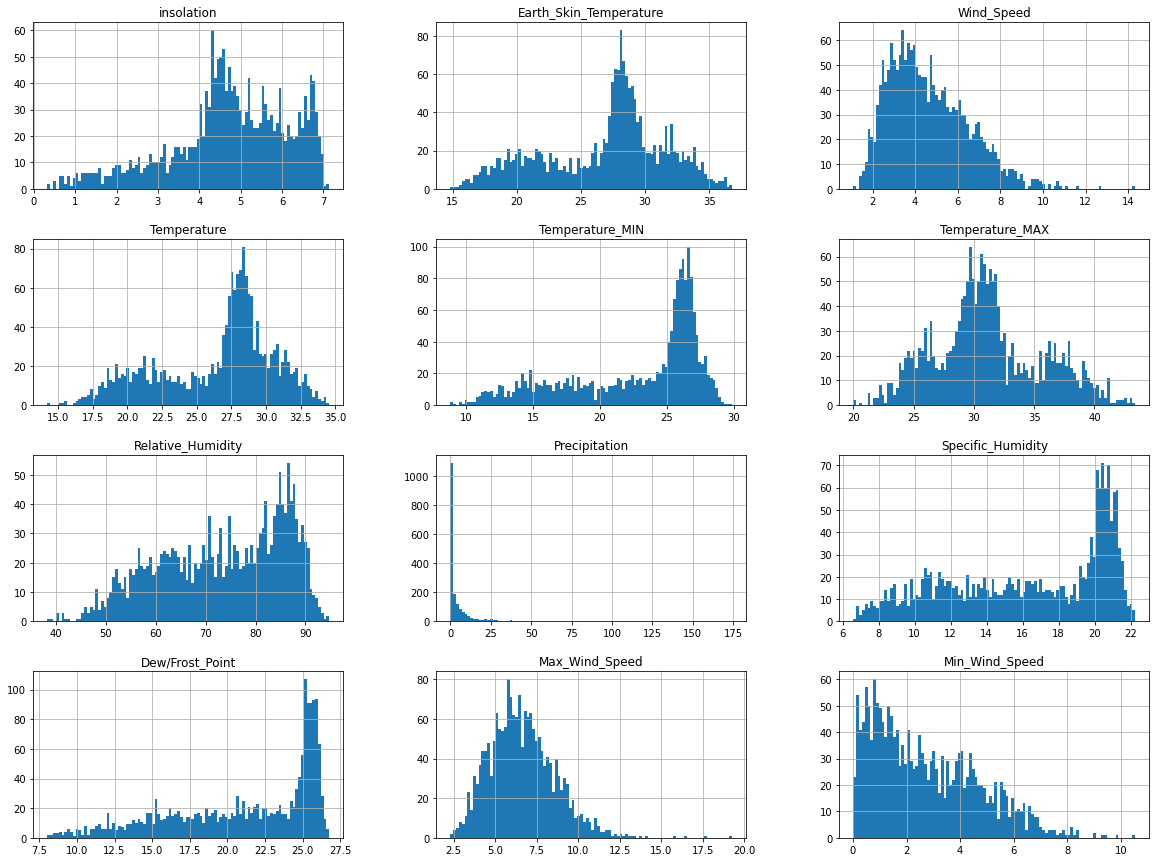

In [20]:
# Data distribution of respective categories
data.hist(bins=100, figsize=(20,15))

25% - It means 25% of all the data entries under that category are under that value.<br>
50% - It means 50% of all the data entries under that category are under that value.<br>
75% - It means 75% of all the data entries under that category are under that value.<br>
count - Number of data entries of that category. <br>
mean - Mean of all data of that category<br>
std - Standard deviation <br>
min - Minimum value <br>
max - Maximum value

In [21]:
#This method is used to view some basic statistical details like percentile, mean, std etc. of a data frame or 
#a series of numeric values.
data.describe()

,insolation,Earth_Skin_Temperature,Wind_Speed,Temperature,Temperature_MIN,Temperature_MAX,Relative_Humidity,Precipitation,Specific_Humidity,Dew/Frost_Point,Max_Wind_Speed,Min_Wind_Speed
count,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000
mean,4.718970,26.883990,4.618440,26.484056,22.634860,31.119507,73.303503,4.674269,16.259721,21.073645,6.640619,2.726338
std,1.450642,4.721542,1.850734,4.133798,4.972618,4.446903,12.481483,10.756903,4.381161,4.807368,1.988834,1.959510
min,0.330000,14.830000,1.100000,14.230000,8.850000,20.000000,38.290000,0.000000,6.600000,8.040000,2.310000,0.020000
25%,4.030000,23.295000,3.190000,23.255000,18.750000,28.405000,63.160000,0.000000,12.375000,17.345000,5.220000,1.050000
50%,4.790000,27.930000,4.290000,27.680000,25.120000,30.720000,74.900000,0.630000,17.050000,22.470000,6.460000,2.350000
75%,5.810000,29.815000,5.850000,29.135000,26.450000,33.830000,84.580000,4.865000,20.375000,25.325000,7.835000,4.095000
max,7.140000,36.790000,14.330000,34.560000,29.860000,43.380000,94.760000,174.320000,22.250000,26.770000,19.280000,10.530000


Now we will look which parameters affects the "insolation". We will form a correlation matrix between the parameters. This will give the linear relationship between the variables.

In [22]:
#This gives the correlation matrix of data
data.corr()

,insolation,Earth_Skin_Temperature,Wind_Speed,Temperature,Temperature_MIN,Temperature_MAX,Relative_Humidity,Precipitation,Specific_Humidity,Dew/Frost_Point,Max_Wind_Speed,Min_Wind_Speed
insolation,1.000000,0.358607,-0.041232,0.310601,0.081854,0.554218,-0.616289,-0.498885,-0.152354,-0.122715,0.043774,-0.093428
Earth_Skin_Temperature,0.358607,1.000000,0.503018,0.991743,0.916152,0.931861,-0.111944,0.103056,0.699878,0.721727,0.532557,0.400386
Wind_Speed,-0.041232,0.503018,1.000000,0.508130,0.523732,0.444344,0.104112,0.333232,0.476666,0.466474,0.911489,0.915791
Temperature,0.310601,0.991743,0.508130,1.000000,0.946317,0.903133,-0.036574,0.137172,0.759039,0.776408,0.517152,0.417795
Temperature_MIN,0.081854,0.916152,0.523732,0.946317,1.000000,0.722835,0.266828,0.272827,0.913222,0.922538,0.475782,0.476974
Temperature_MAX,0.554218,0.931861,0.444344,0.903133,0.722835,1.000000,-0.432992,-0.060004,0.425251,0.451314,0.525614,0.309577
Relative_Humidity,-0.616289,-0.111944,0.104112,-0.036574,0.266828,-0.432992,1.000000,0.408355,0.609861,0.596475,-0.077926,0.225767
Precipitation,-0.498885,0.103056,0.333232,0.137172,0.272827,-0.060004,0.408355,1.000000,0.375760,0.352623,0.331154,0.263224
Specific_Humidity,-0.152354,0.699878,0.476666,0.759039,0.913222,0.425251,0.609861,0.375760,1.000000,0.992131,0.365280,0.483642
Dew/Frost_Point,-0.122715,0.721727,0.466474,0.776408,0.922538,0.451314,0.596475,0.352623,0.992131,1.000000,0.358763,0.471992


As we are interested with the correlation of "insolation" with other parameters only, we will look at that column only. 

In [23]:
#Correlation with 'insolation' parameter only in decreasing order
data.corr()['insolation'].sort_values(ascending=False)

insolation                1.000000
Temperature_MAX           0.554218
Earth_Skin_Temperature    0.358607
Temperature               0.310601
Temperature_MIN           0.081854
Max_Wind_Speed            0.043774
Wind_Speed               -0.041232
Min_Wind_Speed           -0.093428
Dew/Frost_Point          -0.122715
Specific_Humidity        -0.152354
Precipitation            -0.498885
Relative_Humidity        -0.616289
Name: insolation, dtype: float64

Here we can see that maximum temperature, earth skin temperature and average temperature are positively correlated. Precipitation and relative humidity have negative correlation with insolation. Rest of them doesn't affect much to the target parameter.

<AxesSubplot:>

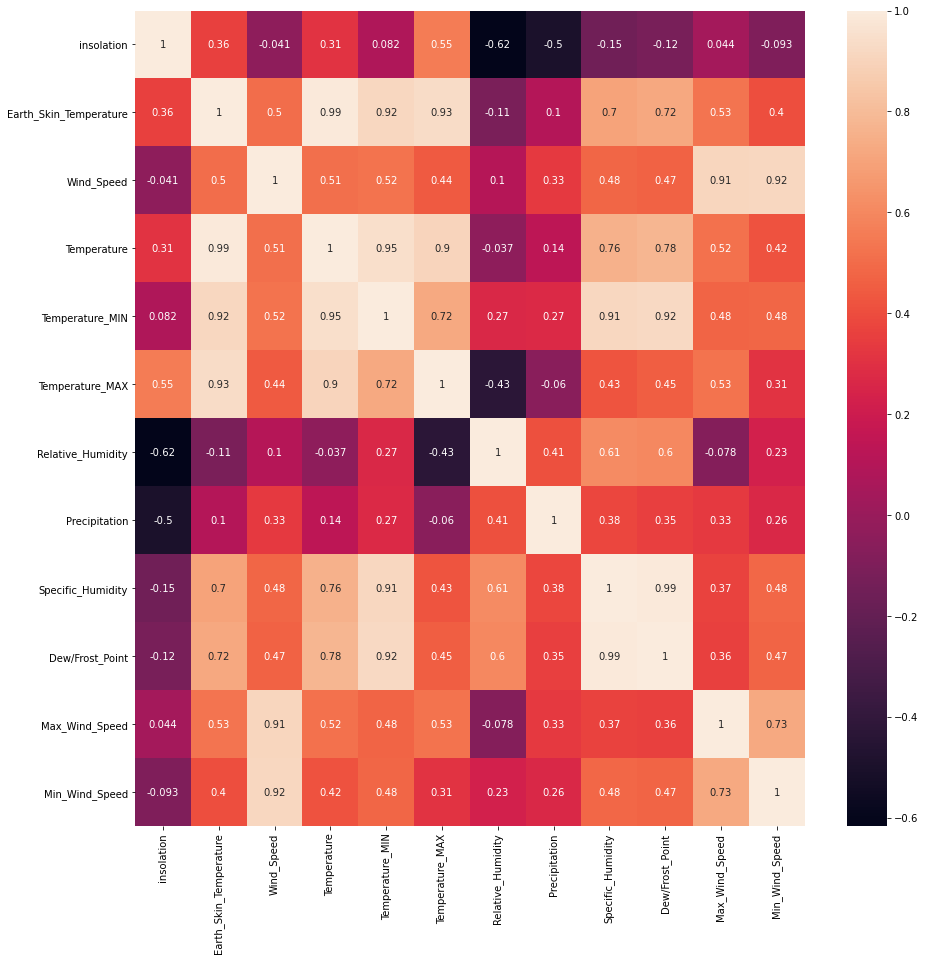

In [24]:
# A different method to view correlation between the variables
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True )

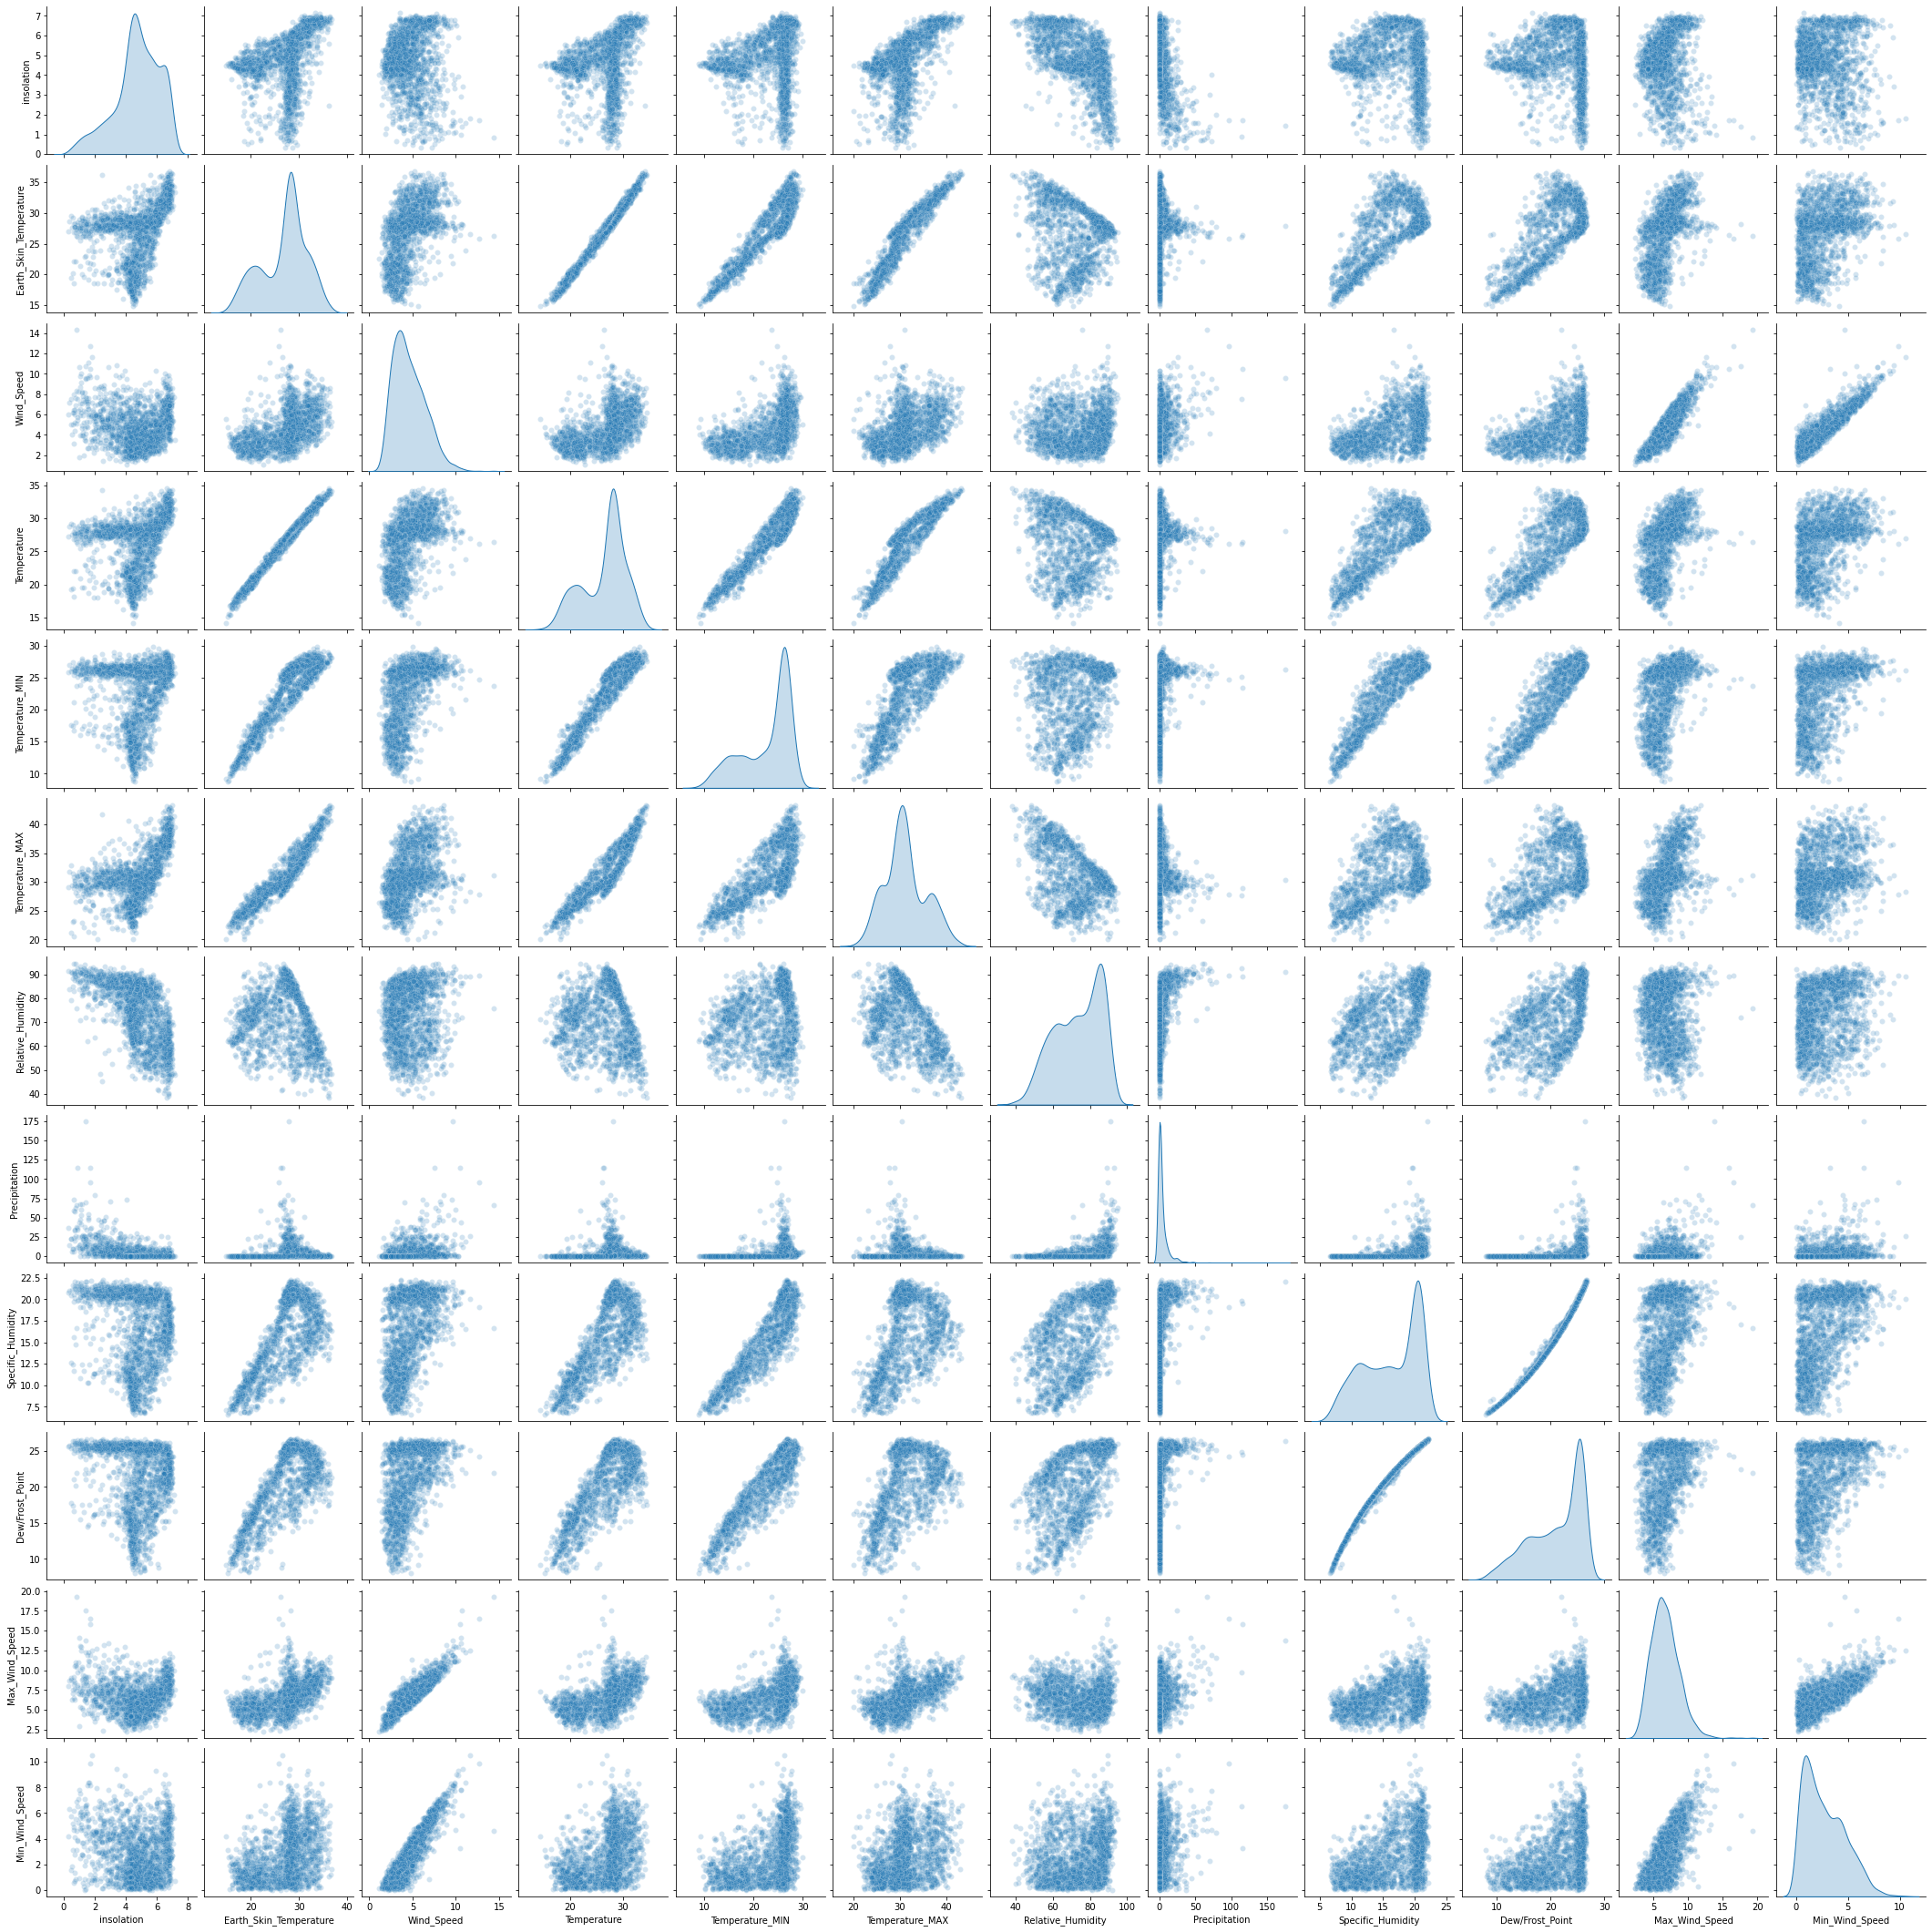

In [25]:
# This will show the distribution between the pairs of different parameters
sns.pairplot(data,diag_kind='kde', plot_kws={'alpha': 0.2})

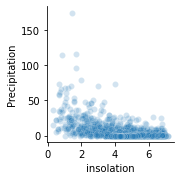

In [26]:
# Isolating Precipitation vs insolation
sns.pairplot(data,x_vars='insolation', y_vars='Precipitation',plot_kws={'alpha': 0.2})

From the correlation matrix we have seen that the "precipitaion" parameter shows strong relationship with the "insolation" parameter with the coefficient of -0.498885. But, from the above plot we can see that it doesn't have much relationship with it. The reason for such a high coefficient is due to the outliers present in the data.

# Feature Selection

If we look at the correlation of "insolation" parameters with other parameters, then we can clearly see that the correlation coefficient with minimum temperature, wind speed, maximum wind speed, minimum wind speed are very low, which means these parameters doesn't affect the insolation. Hence, we can remove them while traing the model.

After carefully observing the heatmap generated above, it can be noticed that the parameters, temperature, maximum tenperature and earth skin temperature are highly correlated with each other (above 0.9). As they are highly correlated with each other, we dont need all three of them to train the models. Only one of them is sufficient to get the desired output.

Similarly, specific humidity and dew/frost point are also highly correlated with each other (0.99). We can drop one of them also.